In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext google.cloud.bigquery

In [2]:
%%bigquery organization_customer

SELECT 
    organization_uuid,
    organization_created,
    first_non_minimal_signup_status_assigned,
    organization_accepted,
    country_id
FROM `izettle-dp-pipeline-prod.legacy_views.organization_customer`
WHERE organization_created >= '2017-09-01'

In [3]:
%%bigquery organization_atc

SELECT
    DISTINCT organization_uuid, activation_date_1, activation_date_10
FROM `izettle-dp-pipeline-prod.legacy_views.merchant_entity`
WHERE organization_created >= '2017-09-01'

# 1. REG AND KYC

In [3]:
reg = organization_customer.shape[0]

In [4]:
organization_customer.head()

,organization_uuid,organization_created,first_non_minimal_signup_status_assigned,organization_accepted,country_id
0,b6f25bd0-9d3a-11e7-8e4e-b28e03578bd2,2017-09-19 13:01:56.109000+00:00,2017-09-19 13:05:36.617000+00:00,2017-09-19 13:05:36.617000+00:00,BR
1,995ee640-97ce-11e7-b8d0-9d5be70d83da,2017-09-12 15:25:25.028000+00:00,2017-09-12 15:29:09.501000+00:00,2017-09-12 15:29:09.501000+00:00,NL
2,3a59fe50-92e2-11e7-a763-c827d470627e,2017-09-06 09:03:19.733000+00:00,2017-09-06 09:25:41.420000+00:00,2017-09-06 09:25:41.420000+00:00,NL
3,a19fbab0-a22c-11e7-bfac-2100b16e74eb,2017-09-25 20:03:43.195000+00:00,2017-09-25 20:08:10.453000+00:00,2017-09-25 20:08:10.453000+00:00,IT
4,6d981d60-96fc-11e7-a4fd-bb3d52a2efc3,2017-09-11 14:20:57.270000+00:00,2017-09-11 14:27:03.183000+00:00,2017-09-11 14:27:03.183000+00:00,NL


In [5]:
organization_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117782 entries, 0 to 1117781
Data columns (total 5 columns):
organization_uuid                           1117782 non-null object
organization_created                        1117782 non-null datetime64[ns, UTC]
first_non_minimal_signup_status_assigned    641572 non-null datetime64[ns, UTC]
organization_accepted                       599454 non-null object
country_id                                  1117782 non-null object
dtypes: datetime64[ns, UTC](2), object(3)
memory usage: 42.6+ MB


In [6]:
kyc_fill = organization_customer[~organization_customer.first_non_minimal_signup_status_assigned.isna()].shape[0]

In [7]:
kyc_accepted = organization_customer[~organization_customer.organization_accepted.isna()].shape[0]

In [8]:
df = pd.DataFrame({'reg':[reg],'kyc_fill':[kyc_fill],'kyc_accepted':[kyc_accepted]})

In [9]:
df_t = df.transpose()
df_t.rename(columns = {0:'nr_merchants'}, inplace = True)


In [10]:
df_t['per'] = round(df_t['nr_merchants']*100/reg,2)
df_t

,nr_merchants,per
reg,1117782,100.00
kyc_fill,641572,57.40
kyc_accepted,599454,53.63


# 2. Time from REG to KYC filling

In [11]:
df_kyc = organization_customer[~organization_customer.first_non_minimal_signup_status_assigned.isna()]

In [12]:
df_kyc['time_diff'] = df_kyc['first_non_minimal_signup_status_assigned'] - df_kyc['organization_created']
df_kyc['days_diff'] = df_kyc['time_diff'].dt.days

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df_kyc.head()

,organization_uuid,organization_created,first_non_minimal_signup_status_assigned,organization_accepted,country_id,time_diff,days_diff
0,b6f25bd0-9d3a-11e7-8e4e-b28e03578bd2,2017-09-19 13:01:56.109000+00:00,2017-09-19 13:05:36.617000+00:00,2017-09-19 13:05:36.617000+00:00,BR,00:03:40.508000,0
1,995ee640-97ce-11e7-b8d0-9d5be70d83da,2017-09-12 15:25:25.028000+00:00,2017-09-12 15:29:09.501000+00:00,2017-09-12 15:29:09.501000+00:00,NL,00:03:44.473000,0
2,3a59fe50-92e2-11e7-a763-c827d470627e,2017-09-06 09:03:19.733000+00:00,2017-09-06 09:25:41.420000+00:00,2017-09-06 09:25:41.420000+00:00,NL,00:22:21.687000,0
3,a19fbab0-a22c-11e7-bfac-2100b16e74eb,2017-09-25 20:03:43.195000+00:00,2017-09-25 20:08:10.453000+00:00,2017-09-25 20:08:10.453000+00:00,IT,00:04:27.258000,0
4,6d981d60-96fc-11e7-a4fd-bb3d52a2efc3,2017-09-11 14:20:57.270000+00:00,2017-09-11 14:27:03.183000+00:00,2017-09-11 14:27:03.183000+00:00,NL,00:06:05.913000,0


In [29]:
df_kyc[df_kyc['days_diff'] == 0]

,organization_uuid,organization_created,first_non_minimal_signup_status_assigned,organization_accepted,country_id,time_diff,days_diff
0,b6f25bd0-9d3a-11e7-8e4e-b28e03578bd2,2017-09-19 13:01:56.109000+00:00,2017-09-19 13:05:36.617000+00:00,2017-09-19 13:05:36.617000+00:00,BR,00:03:40.508000,0
1,995ee640-97ce-11e7-b8d0-9d5be70d83da,2017-09-12 15:25:25.028000+00:00,2017-09-12 15:29:09.501000+00:00,2017-09-12 15:29:09.501000+00:00,NL,00:03:44.473000,0
2,3a59fe50-92e2-11e7-a763-c827d470627e,2017-09-06 09:03:19.733000+00:00,2017-09-06 09:25:41.420000+00:00,2017-09-06 09:25:41.420000+00:00,NL,00:22:21.687000,0
3,a19fbab0-a22c-11e7-bfac-2100b16e74eb,2017-09-25 20:03:43.195000+00:00,2017-09-25 20:08:10.453000+00:00,2017-09-25 20:08:10.453000+00:00,IT,00:04:27.258000,0
4,6d981d60-96fc-11e7-a4fd-bb3d52a2efc3,2017-09-11 14:20:57.270000+00:00,2017-09-11 14:27:03.183000+00:00,2017-09-11 14:27:03.183000+00:00,NL,00:06:05.913000,0
...,...,...,...,...,...,...,...
1117639,2cd60a4c-eea4-11e9-9dd5-40e5dafa12f7,2019-10-14 17:00:50.578000+00:00,2019-10-14 17:05:08.557000+00:00,None,FR,00:04:17.979000,0
1117650,47cecaae-ee7d-11e9-ade1-11de3e462553,2019-10-14 12:22:25.456000+00:00,2019-10-14 12:24:42.389000+00:00,None,FR,00:02:16.933000,0
1117668,71f3b9f6-e81b-11e9-a84a-eb3e4860724a,2019-10-06 09:26:58.507000+00:00,2019-10-06 09:30:45.517000+00:00,None,FR,00:03:47.010000,0
1117680,88a792e2-eaa2-11e9-b363-4af31ab07e48,2019-10-09 14:39:00.979000+00:00,2019-10-09 14:59:28.050000+00:00,None,DE,00:20:27.071000,0


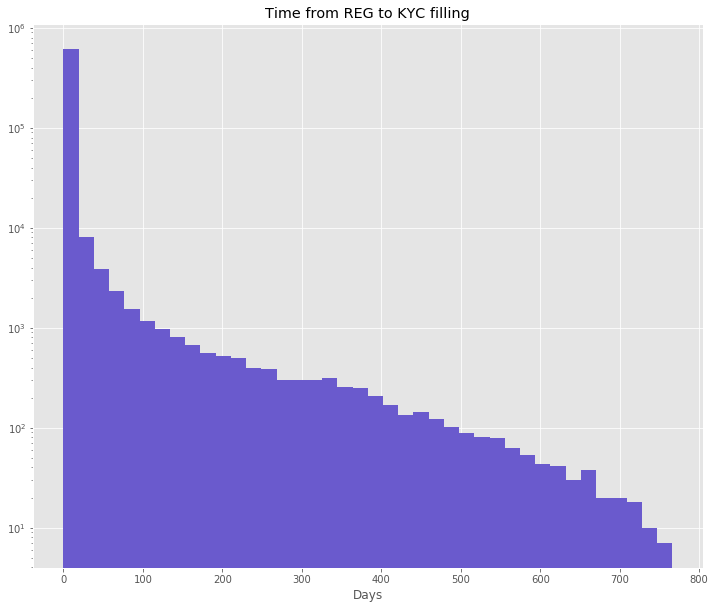

In [14]:
plt.style.use('ggplot')
df_kyc.days_diff.hist(bins = 40, log = True, figsize = (12,10),
                     color = 'slateblue')
plt.xlabel('Days')
plt.title('Time from REG to KYC filling')
plt.show()

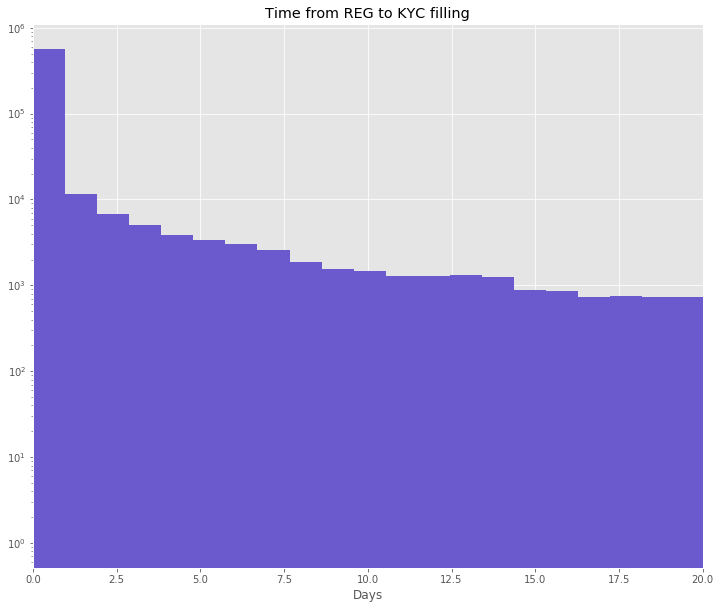

In [20]:
plt.style.use('ggplot')
df_kyc.days_diff.hist(bins = 800, log = True, figsize = (12,10),
                     color = 'slateblue')
plt.xlim(0,20)
plt.xlabel('Days')
plt.title('Time from REG to KYC filling')
plt.show()

- 88% of merchants filling KYC form within the day of REG
- 90% of merchants filling KYC form within 1 day after REG
- 97% of merchants filling KYC form within 1 month after REG

In [34]:
df_kyc[df_kyc['days_diff'] <= 1].shape[0]

577816

In [31]:
df_kyc[df_kyc['days_diff'] == 0].shape[0]

566362

In [36]:
df_kyc[df_kyc['days_diff'] <= 30].shape[0]

622226

In [37]:
622226/df_kyc.shape[0]

0.9698459409076456

# 3. ACT1 and ACT10

In [20]:
organization_atc.head()

,organization_uuid,activation_date_1,activation_date_10
0,b16b02b0-7ce7-11e8-9587-75fb4b5c9267,2018-07-17,2018-09-10
1,4fd57030-fa38-11e7-80be-c1101b5e2623,2018-01-15,2018-02-20
2,c8f07f30-97a2-11e7-9dcd-f28da440e39f,2017-09-19,2017-11-17
3,4a787160-c783-11e7-9c99-0b9614d19450,2017-11-29,2017-11-30
4,e6db70f0-00e2-11e8-aa72-9443b937c0c8,2018-04-13,2018-09-10


In [21]:
organization_atc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640574 entries, 0 to 640573
Data columns (total 3 columns):
organization_uuid     640574 non-null object
activation_date_1     400908 non-null object
activation_date_10    275301 non-null object
dtypes: object(3)
memory usage: 14.7+ MB


In [22]:
act1 = organization_atc[~organization_atc.activation_date_1.isna()].shape[0]
act10 = organization_atc[~organization_atc.activation_date_10.isna()].shape[0]

In [28]:
df_t.at['act1','nr_merchants'] = act1
df_t.at['act10','nr_merchants'] = act10
df_t.at['act1','per'] = act1*100/reg
df_t.at['act10','per'] = act10*100/reg

In [29]:
df_t

,nr_merchants,per
reg,1116249.0,100.000000
kyc_fill,640574.0,57.390000
kyc_accepted,598531.0,53.620000
act1,400908.0,35.915642
act10,275301.0,24.663046


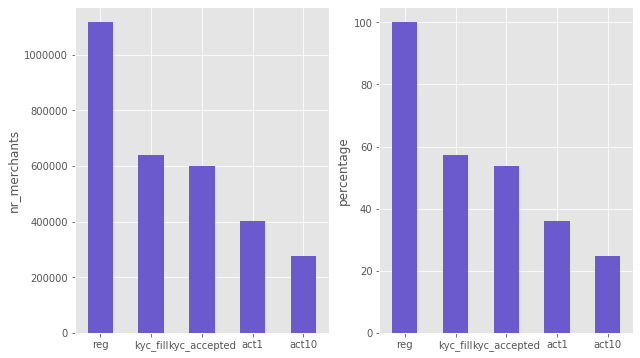

In [36]:
fig = plt.figure()
fig.add_subplot(1,2,1)
df_t['nr_merchants'].plot(kind = 'bar', 
         color = 'slateblue', rot = 0, figsize = (10,6))
plt.ylabel('nr_merchants')
#plt.show()

fig.add_subplot(1,2,2)
df_t['per'].plot(kind = 'bar',
         color = 'slateblue', rot = 0, figsize = (10,6))
plt.ylabel('percentage')
plt.show()